# The Tsyganenko module in Python

### John C. Coxon
University of Southampton, United Kingdom  
J.Coxon@soton.ac.uk

# History of the module

* Based directly on Geopack-2008.for by N. A. Tsyganenko
* Originally implemented using `f2py` by S. de Larquier in 2012, but not updated since
* Updated by J. C. Coxon in 2020:
    * Now uses the latest release (January 2020) of Geopack
        * Updated IGRF coefficients (from IGRF-11 to IGRF-13)
    * New unit tests to prevent bugs from updates to Geopack
    * Fortran scripts to compare to expected unit test outputs
    * New Python functions to nicely wrap Geopack subroutines

# Installing the module

**This module requires `numpy`, `matplotlib`, `f2py` and `gfortran`.**

```
git clone https://github.com/johncoxon/tsyganenko.git
cd tsyganenko
python setup.py install
cd tests
python -m unittest test.Trace1965to2015
```

# The `Trace` class

In [1]:
import datetime
import numpy as np
import tsyganenko as tsy

trace_dt = datetime.datetime(2001,9,22,12)
lats = np.arange(10, 90, 10)
lons = 180.
rhos = tsy.RE
trace = tsy.Trace(lats, lons, rhos, datetime=trace_dt)

In [2]:
print(trace)


vsw_gse=[  -400,     0,     0]   [m/s]
pdyn=       2.0                  [nPa]
dst=       -5.0                  [nT]
by_imf=     0.0                  [nT]
bz_imf=    -5.0                  [nT]

Coords: geo
(latitude [deg], longitude [deg], distance from center of the Earth [km])

(10.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(10.000, 180.000, 6371.200)
    --> SH(-4.753, 177.493, 6371.146)
(20.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(20.000, 180.000, 6371.162)
    --> SH(-12.857, 174.421, 6371.148)
(30.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(30.000, 180.000, 6371.200)
    --> SH(-20.612, 171.449, 6371.192)
(40.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(40.000, 180.000, 6371.201)
    --> SH(-28.542, 168.266, 6371.176)
(50.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(50.000, 180.000, 6371.200)
    --> SH(-36.933, 164.254, 6371.191)
(60.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(60.000, 180.000, 6

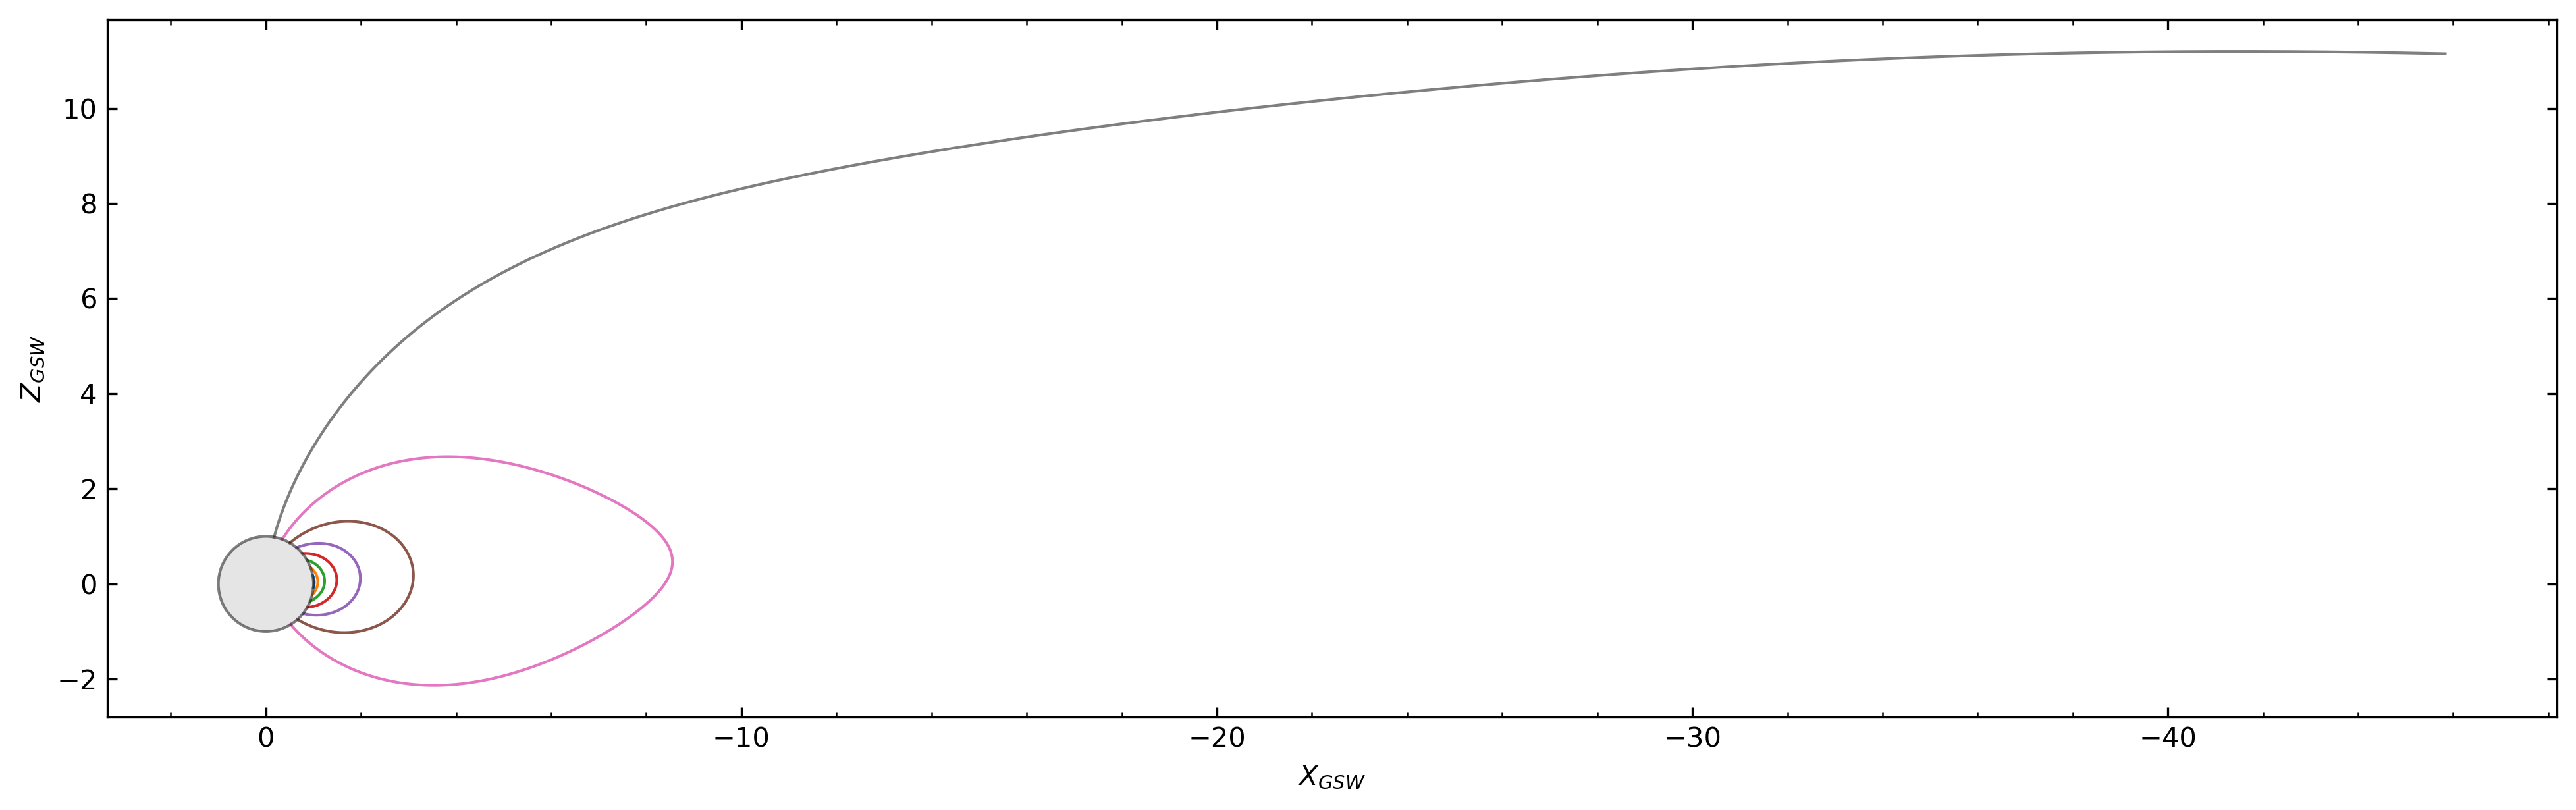

In [3]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16,9), dpi=300)
trace.plot()
plt.show()

# Example usage: visualising the Dungey Cycle

In [4]:
trace_dt = dt.datetime(2001,9,22,12)

latlon = np.array([[60,     0],
                   [71,     0],
                   [84,     0],
                   [84,   180],
                   [80,   180],
                   [76,   180],
                   [71.5, 180],
                   [71,   180],
                   [69,   180],
                   [60,   180]])

video_trace = tsy.Trace(latlon[:,0], latlon[:,1], tsy.RE, datetime = trace_dt)

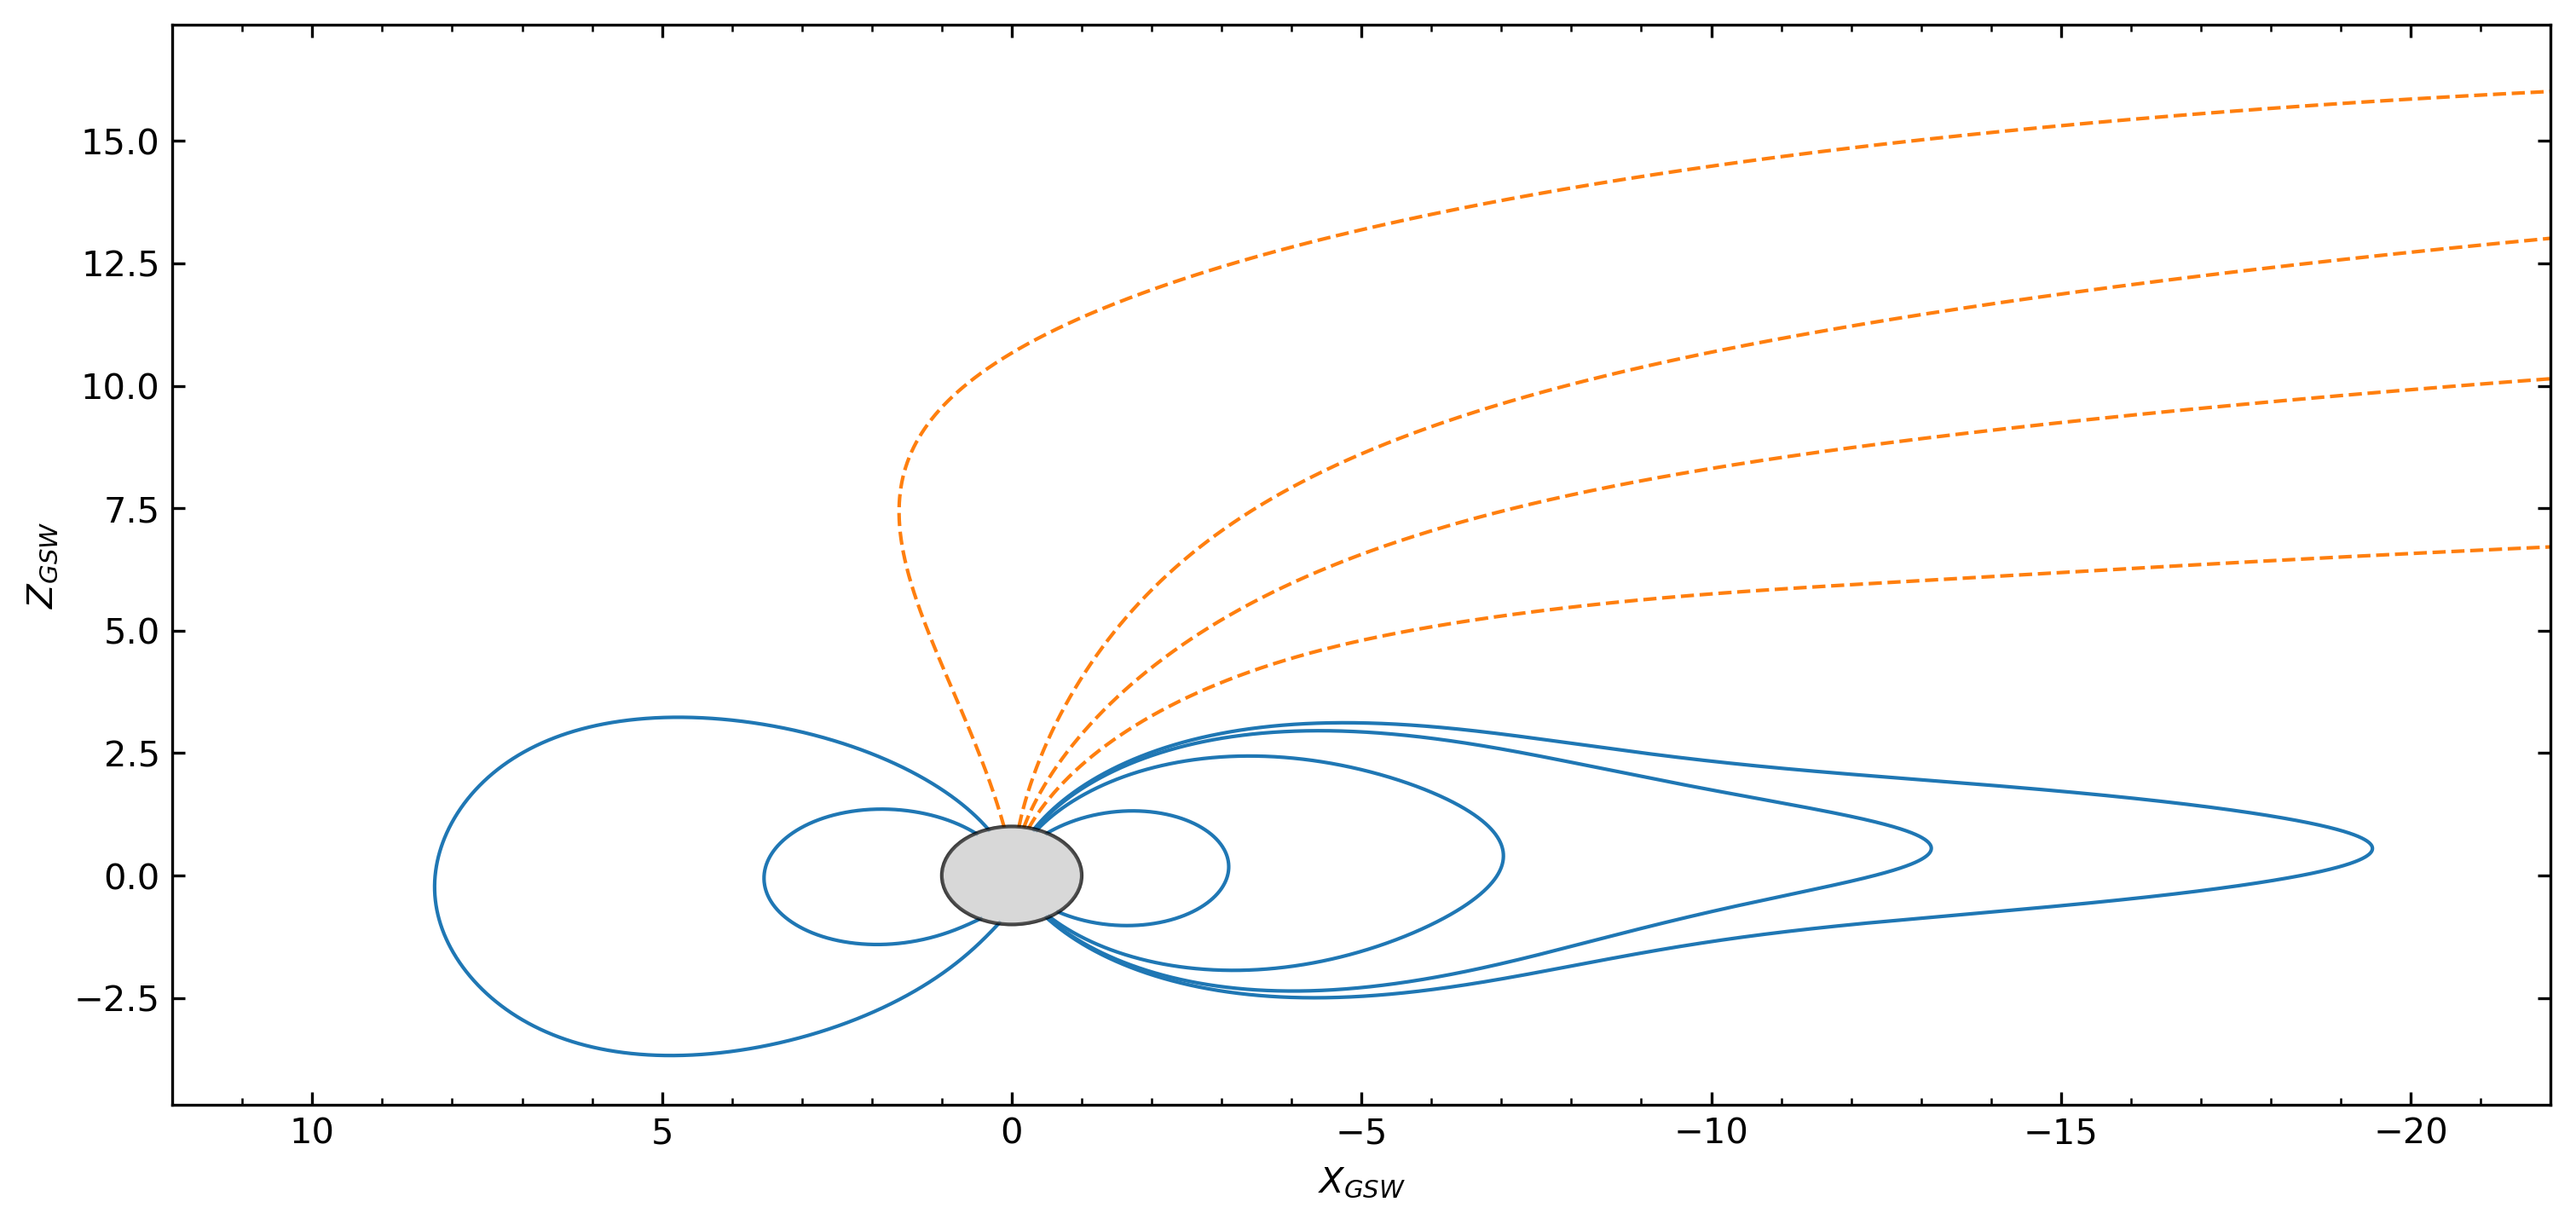

In [5]:
fig, ax = plt.subplots(figsize=(12,6), dpi=300)
video_trace.plot(only_pts=[0,1,6,7,8,9], color='C0')
video_trace.plot(only_pts=[2,3,4,5], color='C1', ls='--')
ax.set(xlim=(12, -22), aspect=0.7)
plt.show()

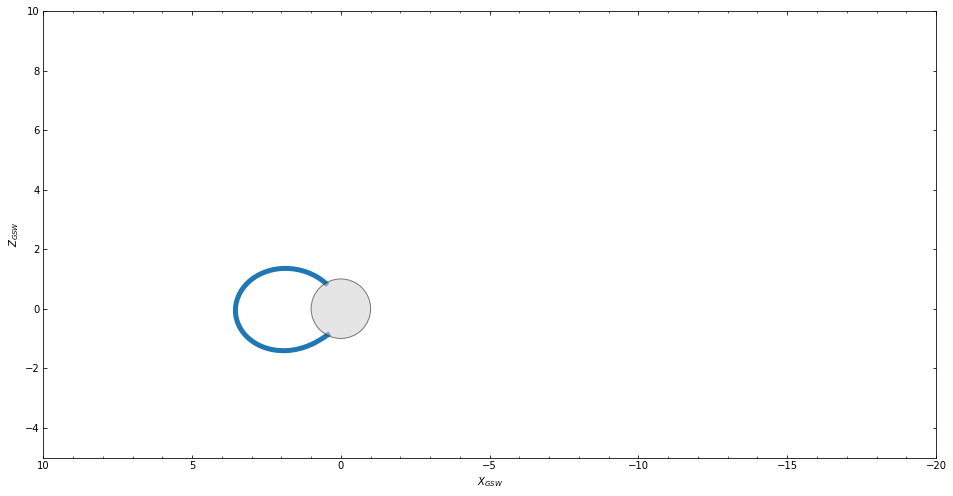

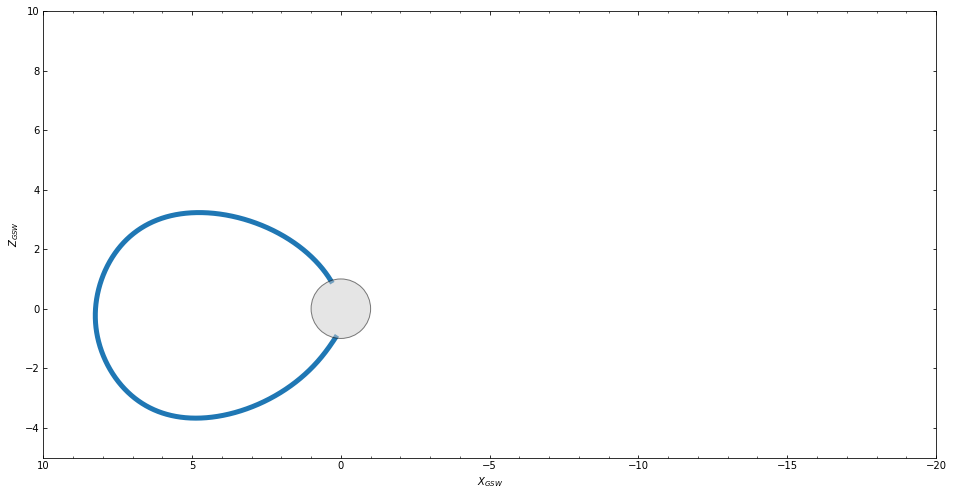

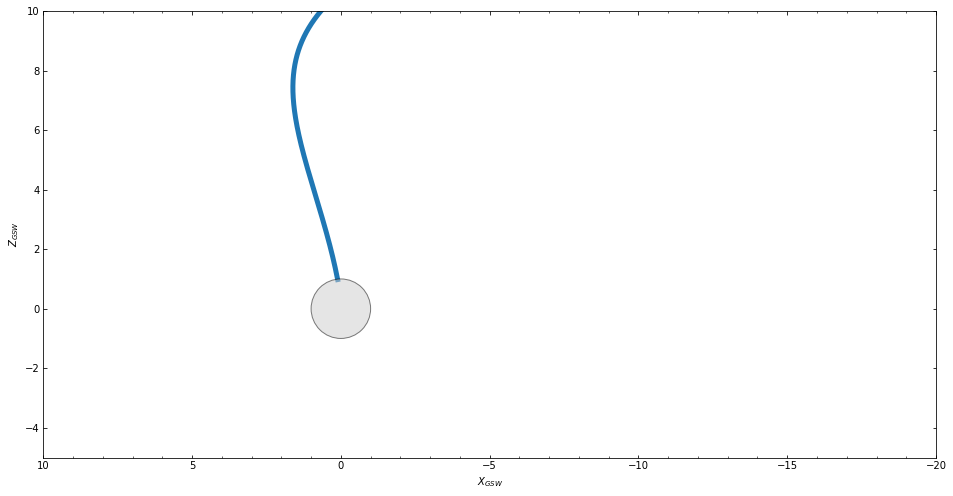

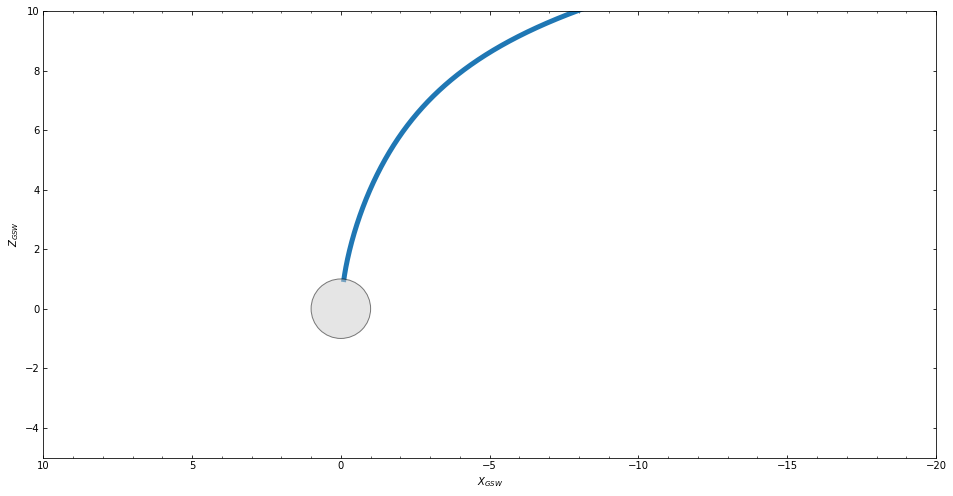

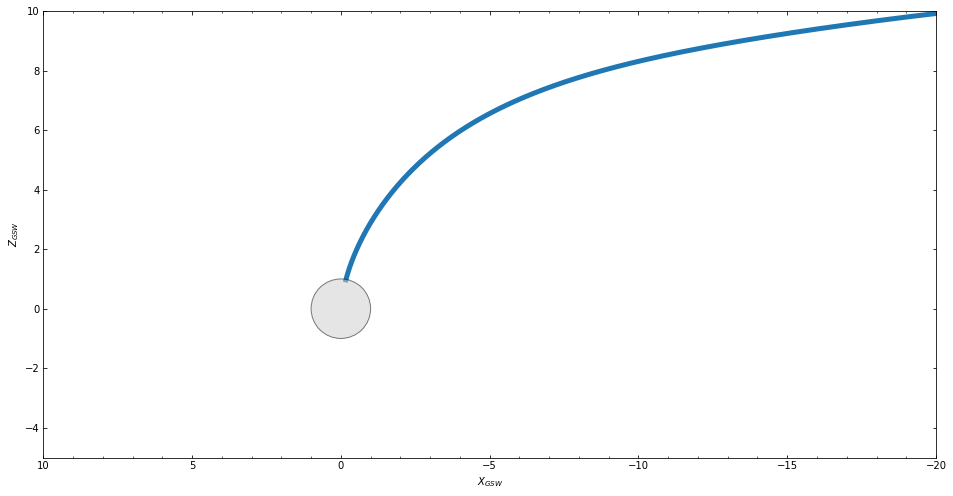

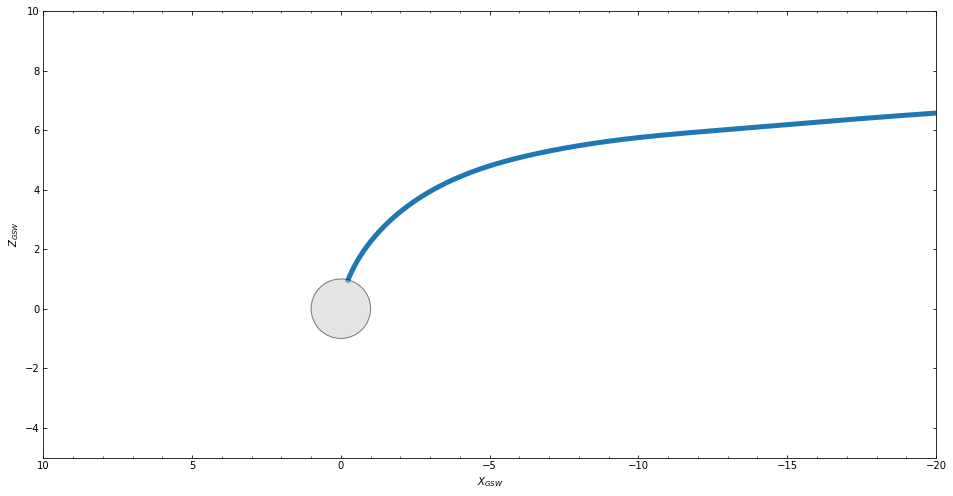

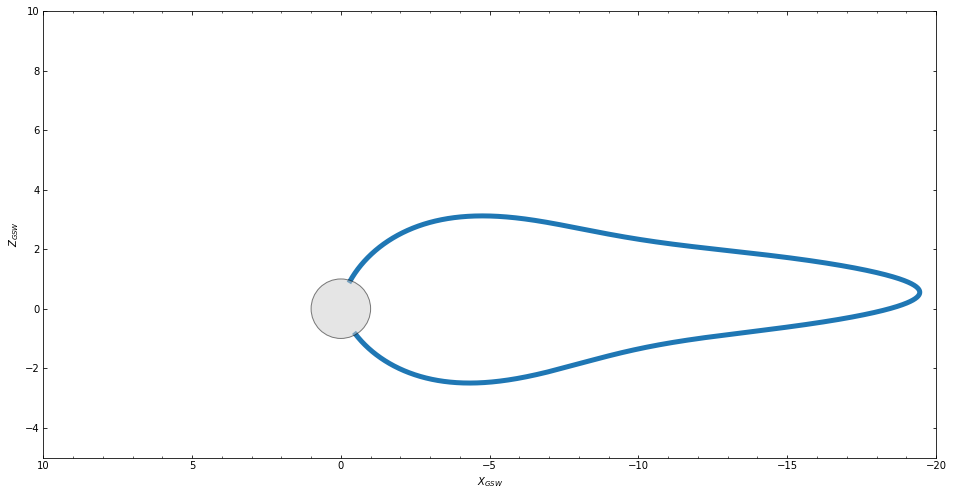

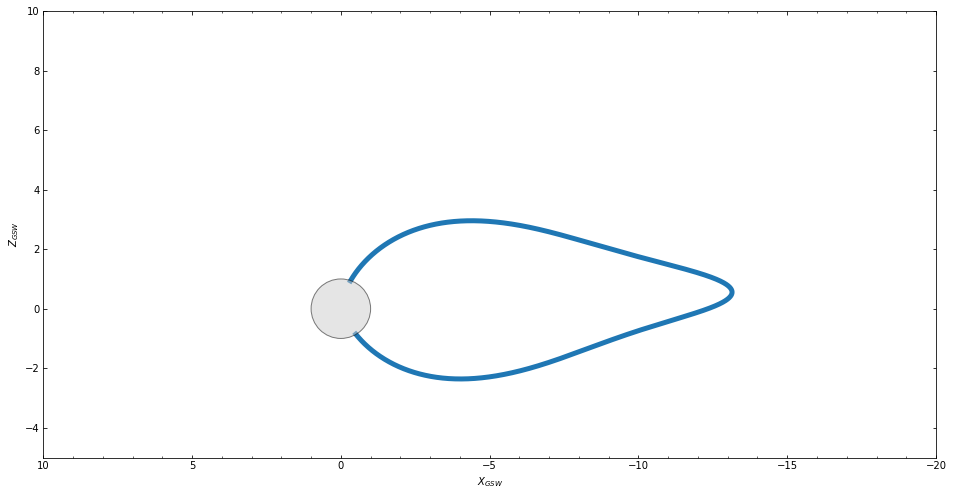

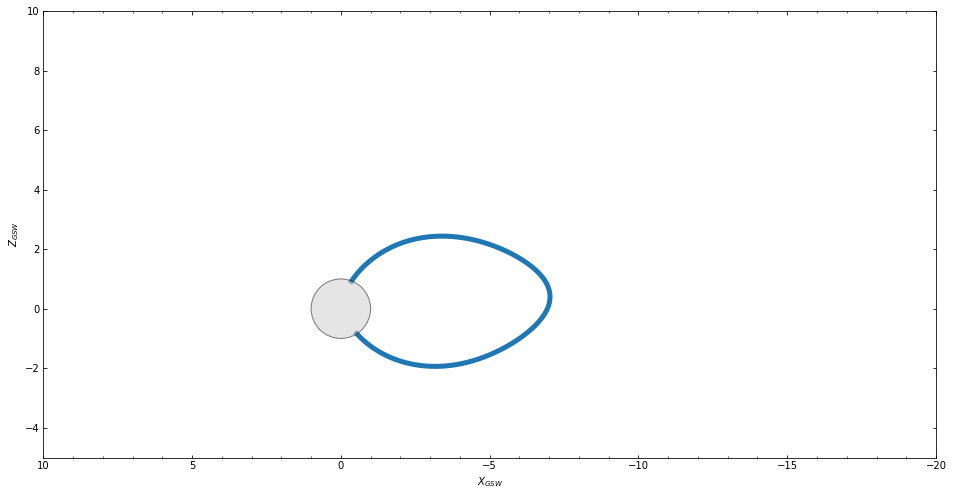

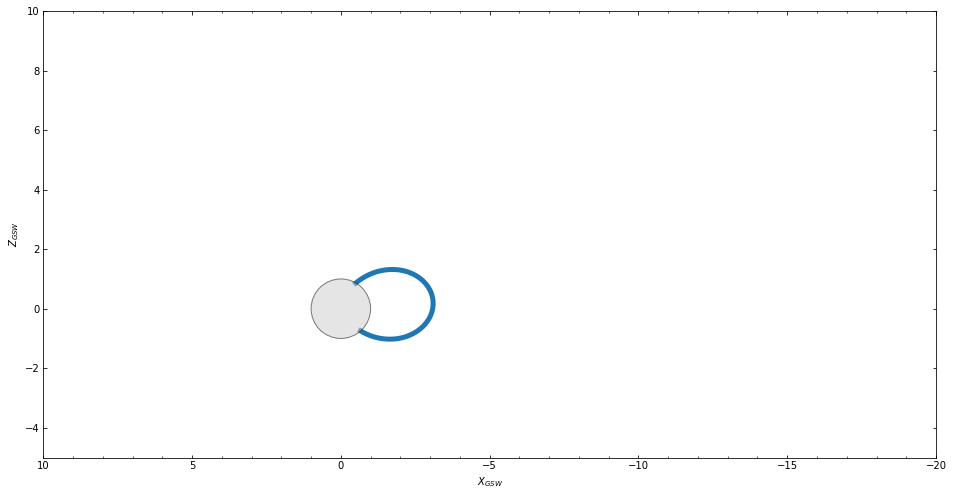

In [6]:
for i, _ in enumerate(latlon):
    fig, ax = plt.subplots(figsize = [16,9])
    video_trace.plot(ax, only_pts=i, lw=5)
    ax.set(xlim=(10,-20), ylim=(-5,10), aspect='equal')
    fig.savefig("Frame {:02d}.png".format(i))

In [7]:
from IPython.display import Video

Video("Dungey Cycle.mov", width=900)

# The `geopack` submodule

## `recalc_08`

As with `Geopack`, you **must** call `recalc_08` before doing anything else.

In [8]:
# Date and time
year = 2000
doy = 1
hour = 0
minute = 0
second = 0

# Solar wind speed
vxgse = -400.
vygse = 0.
vzgse = 0.

tsy.geopack.recalc_08(year, doy, hour, minute, second, vxgse, vygse, vzgse)

## Then you can use the `geopack` subroutines!

### Coordinate conversions

* `Geopack` provides several Fortran subroutines for coordinate conversions
* Due to idiosyncrasies with the way Python and Fortran intersect, you have dummy variables in both the inputs and the outputs to the Python wrappers
* The `convert` submodule aims to provide a more Pythonic interface to these routines

In [9]:
# Start point
rho = 1.
lat = 60.
lon = 0.

# Convert lat,lon to geographic cartesian and then gsw
_, _, _, xgeo, ygeo, zgeo = tsy.geopack.sphcar_08(
    rho, np.radians(90. - lat), np.radians(lon), 0., 0., 0., 1)

print("Geographic cartesian coordinates: X = {:.2f} RE, Y = {:.2f} RE, Z = {:.2f} RE\n".format(xgeo, ygeo, zgeo))

_, _, _, xgsw, ygsw, zgsw = tsy.geopack.geogsw_08(
    xgeo, ygeo, zgeo, 0., 0. , 0., 1)

print("GSW cartesian coordinates: X = {:.2f} RE, Y = {:.2f} RE, Z = {:.2f} RE".format(xgsw, ygsw, zgsw))

Geographic cartesian coordinates: X = 0.50 RE, Y = 0.00 RE, Z = 0.87 RE

GSW cartesian coordinates: X = -0.80 RE, Y = -0.11 RE, Z = 0.59 RE


In [10]:
xgeo, ygeo, zgeo = tsy.convert.sph_to_car(rho, np.radians(90. - lat), np.radians(lon))

print("Geographic cartesian coordinates: X = {:.2f} RE, Y = {:.2f} RE, Z = {:.2f} RE\n".format(xgeo, ygeo, zgeo))

xgsw, ygsw, zgsw = tsy.convert.coordinates(xgeo, ygeo, zgeo, 'GEO', 'GSW')

print("GSW cartesian coordinates: X = {:.2f} RE, Y = {:.2f} RE, Z = {:.2f} RE".format(xgsw, ygsw, zgsw))

Geographic cartesian coordinates: X = 0.50 RE, Y = 0.00 RE, Z = 0.87 RE

GSW cartesian coordinates: X = -0.80 RE, Y = -0.11 RE, Z = 0.59 RE


In [11]:
lmax = 5000
rlim = 60.
r0 = 1. 
dsmax = .01
err = .000001

# Direction of the tracing
mapto = 1

# Magnetic activity (for T96, the first four elements of parmod are
# solar wind dynamic pressure (nPa), Dst (nT), BY IMF (nT) and BZ IMF (nT)).
parmod = np.zeros(10, dtype=float)
parmod[0:4] = [2., -8., -2., -5.]

# Trace field line
xgsw_out, ygsw_out, zgsw_out, xarr, yarr, zarr, l_cnt = tsy.geopack.trace_08(
    xgsw, ygsw, zgsw, mapto, dsmax, err, rlim, r0, 0, parmod,
    'T96_01', 'IGRF_GSW_08', lmax)

In [12]:
x_out, y_out, z_out = tsy.convert.coordinates(xgsw_out, ygsw_out, zgsw_out, 'GSW', 'GEO')
rho_out, colat_out, lon_out = tsy.convert.car_to_sph(x_out, y_out, z_out)

print("Start: {:6.3f}, {:6.3f}, {:6.3f}".format(lat, lon, rho))
print("Stop:  {:6.3f}, {:6.3f}, {:6.3f}".format(90 - np.degrees(colat_out), np.degrees(lon_out), rho_out))

Start: 60.000,  0.000,  1.000
Stop:  -56.720, 34.164,  1.000


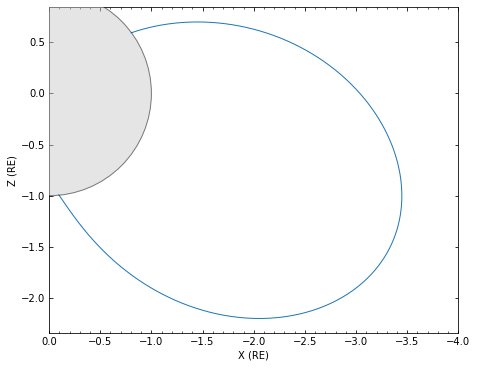

In [13]:
from matplotlib import patches

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(xarr[:l_cnt], zarr[:l_cnt])
ax.set(xlim=(0,-4), aspect=1, xlabel="X (RE)", ylabel="Z (RE)")

circle = patches.Circle(xy=(0, 0), radius=1, facecolor="0.8", edgecolor="k", alpha=.5, zorder=4)
ax.add_patch(circle)

plt.show()

# Conclusions

* `tsyganenko` has been updated and provides convenient access to Geopack in Python
* Pythonic wrappers and direct access to the Fortran subroutines are both available
* Future updates to Geopack should be easy to incorporate and test with the new test suite


* I am keen to solicit feedback from the community: please email me!
* A member of the Software Sustainability Institute in Southampton is currently reviewing the code
* Thanks to N. A. Tsyganenko for Geopack and to S. de Larquier for getting the ball rolling!